1. Introduction to Problem
2. Importing the libraries
3. Type of machine learning system to build
4. Loading the data
5. Exploratory Data Analysis and cleaning
6. Visualization of data, finding patterns
7. Feature Engineering
8. Choosing the best model
9. Training the model
10. Make Predictions
11. Submission

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
gender = pd.read_csv('./data/gender_submission.csv', header=0)
train = pd.read_csv('./data/train.csv', header=0)
test = pd.read_csv('./data/test.csv', header=0)

In [3]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


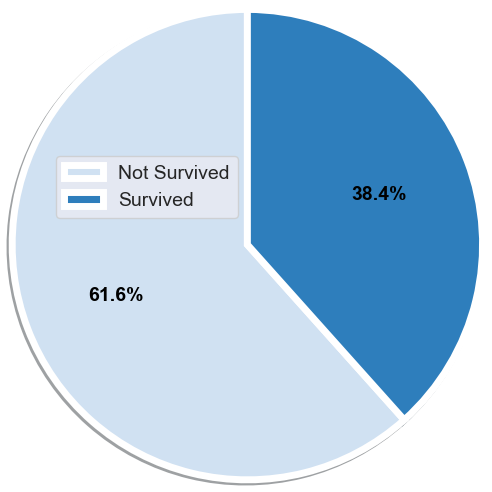

In [67]:
plt.style.use('_mpl-gallery-nogrid')

# survived rate based on sex pie plot
x = train['Survived'].unique()
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
#plot
fig, ax = plt.subplots()
ax.pie(train['Survived'].value_counts(), colors=colors, radius=3, center=(4,4),
       wedgeprops={"linewidth":5, "edgecolor":"white"}, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 14, 'color':'black', 'fontweight':'bold'})
# labels and title
ax.legend(['Not Survived', 'Survived'], loc='upper right', fontsize=14, bbox_to_anchor=(0.5, 1))
plt.show()

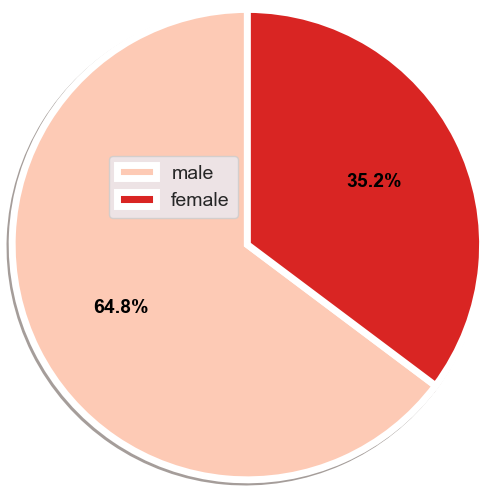

In [68]:
plt.style.use('_mpl-gallery-nogrid')

# survived rate based on sex pie plot
x = train['Sex']
colors = plt.get_cmap('Reds')(np.linspace(0.2, 0.7, len(x.unique())))
#plot
fig, ax = plt.subplots()
ax.pie(x.value_counts(), colors=colors, radius=3, center=(4,4),
       wedgeprops={"linewidth":5, "edgecolor":"white"}, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 14, 'color':'black', 'fontweight':'bold'})
# labels and title
ax.legend(['male','female'],loc='upper right', fontsize=14, bbox_to_anchor=(0.5, 1))
plt.show()

In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df = pd.DataFrame(columns=['Column', 'Count', 'Null', '% Null', 'Type', 'Unique'])
for i, (col, cnt) in enumerate(train.count().items()):
    null_count = train.shape[0] - cnt
    null_percentage = round((null_count / train.shape[0]) * 100, 2)
    data_type = train[col].dtype
    unique = train[col].nunique()

    df.loc[i] = [col, cnt, null_count, null_percentage, data_type, unique]

print(df)

         Column  Count  Null  % Null     Type  Unique
0   PassengerId    891     0    0.00    int64     891
1      Survived    891     0    0.00    int64       2
2        Pclass    891     0    0.00    int64       3
3          Name    891     0    0.00   object     891
4           Sex    891     0    0.00   object       2
5           Age    714   177   19.87  float64      88
6         SibSp    891     0    0.00    int64       7
7         Parch    891     0    0.00    int64       7
8        Ticket    891     0    0.00   object     681
9          Fare    891     0    0.00  float64     248
10        Cabin    204   687   77.10   object     147
11     Embarked    889     2    0.22   object       3


In [31]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# describe the data and round it to 2 decimal places, if it is a float else whole number
def info_data(data):
    df = pd.DataFrame(columns=['Column', 'Count', 'Null', '% Null', 'Type', 'Unique'])
    for i, (col, cnt) in enumerate(data.count().items()):
        null_count = data.shape[0] - cnt
        null_percentage = round((null_count / data.shape[0]) * 100, 2)
        data_type = data[col].dtype
        unique = data[col].nunique()

        df.loc[i] = [col, cnt, null_count, null_percentage, data_type, unique]

    return df

In [41]:
info_data(train)

,Column,Count,Null,% Null,Type,Unique
0,PassengerId,891,0,0.00,int64,891
1,Survived,891,0,0.00,int64,2
2,Pclass,891,0,0.00,int64,3
3,Name,891,0,0.00,object,891
4,Sex,891,0,0.00,object,2
5,Age,714,177,19.87,float64,88
6,SibSp,891,0,0.00,int64,7
7,Parch,891,0,0.00,int64,7
8,Ticket,891,0,0.00,object,681
9,Fare,891,0,0.00,float64,248


In [44]:
# count,mean,std,min,25%,50%,75%,max
def describe_data(data):
    df = pd.DataFrame(columns=['Column', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max',])
    #for each column
    for i, (col, cnt) in enumerate(data.count().items()):   
        if data[col].dtype in ['int64', 'float64']:
            mean = round(data[col].mean(), 2)
            std = round(data[col].std(), 2)
            minimum = round(data[col].min(), 2)
            twenty_five = round(data[col].quantile(0.25), 2)
            fifty = round(data[col].quantile(0.5), 2)
            seventy_five = round(data[col].quantile(0.75), 2)
            maximum = round(data[col].max(), 2)          
        df.loc[i] = [col, cnt, mean, std, minimum, twenty_five, fifty, seventy_five, maximum]
    return df


In [45]:
describe_data(train)

,Column,Count,Mean,Std,Min,25%,50%,75%,Max
0,PassengerId,891,446.00,257.35,1.00,223.50,446.00,668.5,891.00
1,Survived,891,0.38,0.49,0.00,0.00,0.00,1.0,1.00
2,Pclass,891,2.31,0.84,1.00,2.00,3.00,3.0,3.00
3,Name,891,2.31,0.84,1.00,2.00,3.00,3.0,3.00
4,Sex,891,2.31,0.84,1.00,2.00,3.00,3.0,3.00
5,Age,714,29.70,14.53,0.42,20.12,28.00,38.0,80.00
6,SibSp,891,0.52,1.10,0.00,0.00,0.00,1.0,8.00
7,Parch,891,0.38,0.81,0.00,0.00,0.00,0.0,6.00
8,Ticket,891,0.38,0.81,0.00,0.00,0.00,0.0,6.00
9,Fare,891,32.20,49.69,0.00,7.91,14.45,31.0,512.33
